In [9]:
import os
import nltk
import string
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.manifold import TSNE
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.decomposition import PCA
from nltk.tokenize import word_tokenize
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

In [2]:
nltk.download('punkt') # for tokenizing

# Helper function to read data from a labeled directory
def read_data_from_directory(directory_path):
    authors = os.listdir(directory_path)
    texts = []
    labels = []
    for author in authors:
        author_path = os.path.join(directory_path, author)
        for file_name in os.listdir(author_path):
            file_path = os.path.join(author_path, file_name)
            with open(file_path, 'r', encoding='utf-8') as f:
                texts.append(f.read())
                labels.append(author)
    return texts, labels

# Reading the training and test data
train_texts, train_labels = read_data_from_directory("C:/Users/Sai/OneDrive/Desktop/College_Stuff/Intro_to_ML_Stuff/Unsupervised Learning James Scott/STA380/data/ReutersC50/C50train")
test_texts, test_labels = read_data_from_directory("C:/Users/Sai/OneDrive/Desktop/College_Stuff/Intro_to_ML_Stuff/Unsupervised Learning James Scott/STA380/data/ReutersC50/C50test")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sai\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
word_tokenize(train_texts[0])

['The',
 'Internet',
 'may',
 'be',
 'overflowing',
 'with',
 'new',
 'technology',
 'but',
 'crime',
 'in',
 'cyberspace',
 'is',
 'still',
 'of',
 'the',
 'old-fashioned',
 'variety',
 '.',
 'The',
 'National',
 'Consumers',
 'League',
 'said',
 'Wednesday',
 'that',
 'the',
 'most',
 'popular',
 'scam',
 'on',
 'the',
 'Internet',
 'was',
 'the',
 'pyramid',
 'scheme',
 ',',
 'in',
 'which',
 'early',
 'investors',
 'in',
 'a',
 'bogus',
 'fund',
 'are',
 'paid',
 'off',
 'with',
 'deposits',
 'of',
 'later',
 'investors',
 '.',
 'The',
 'league',
 ',',
 'a',
 'non-profit',
 'consumer',
 'advocacy',
 'group',
 ',',
 'tracks',
 'web',
 'scams',
 'through',
 'a',
 'site',
 'it',
 'set',
 'up',
 'on',
 'the',
 'world',
 'wide',
 'web',
 'in',
 'February',
 'called',
 'Internet',
 'Fraud',
 'Watch',
 'at',
 'http',
 ':',
 '//www.fraud.org',
 '.',
 'The',
 'site',
 ',',
 'which',
 'collects',
 'reports',
 'directly',
 'from',
 'consumers',
 ',',
 'has',
 'been',
 'widely',
 'praised',
 '

In [4]:
# Helper function to tokenize, remove punctuation, and stem
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Tokenize
    tokens = word_tokenize(text.lower())
    
    # Remove punctuation
    tokens = [token for token in tokens if token not in string.punctuation and token not in stop_words]
    
    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    
    return stemmed_tokens

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
# Basic Statistics
print(f"Total number of training documents: {len(train_texts)}")
print(f"Total number of test documents: {len(test_texts)}")

train_doc_lengths = [len(preprocess_text(text)) for text in train_texts]
test_doc_lengths = [len(preprocess_text(text)) for text in test_texts]

print(f"\nAverage document length in training set: {np.mean(train_doc_lengths)} words")
print(f"Minimum document length in training set: {np.min(train_doc_lengths)} words")
print(f"Maximum document length in training set: {np.max(train_doc_lengths)} words")
print(f"\nAverage document length in test set: {np.mean(test_doc_lengths)} words")
print(f"Minimum document length in test set: {np.min(test_doc_lengths)} words")
print(f"Maximum document length in test set: {np.max(test_doc_lengths)} words")

Total number of training documents: 2500
Total number of test documents: 2500

Average document length in training set: 328.4308 words
Minimum document length in training set: 33 words
Maximum document length in training set: 957 words

Average document length in test set: 333.2568 words
Minimum document length in test set: 42 words
Maximum document length in test set: 934 words



Most common words across the training set:
said: 19856
's: 14872
'': 13882
``: 13712
year: 6146
compani: 5651
would: 5237
percent: 5211
million: 4942
market: 4629


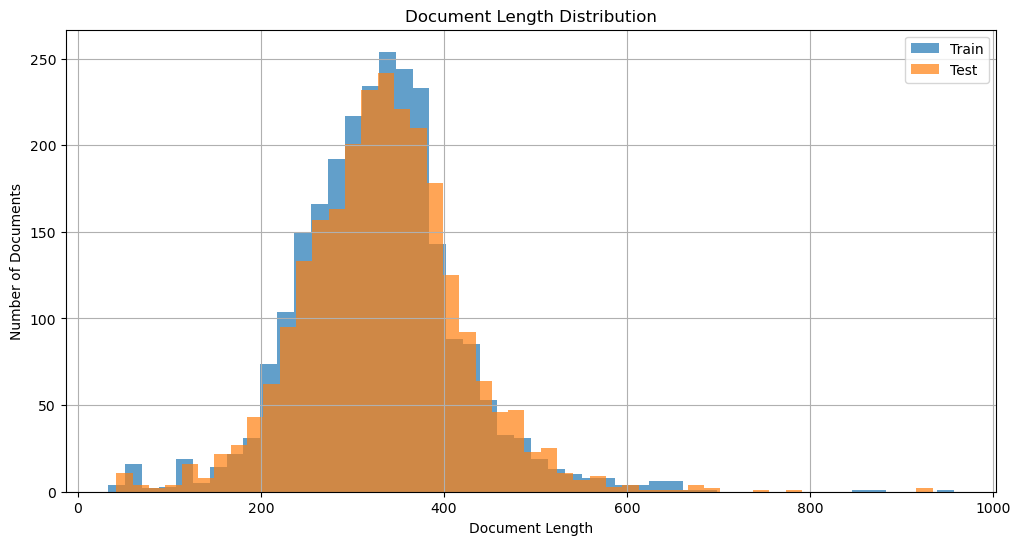

In [6]:
# Term Frequencies
all_tokens = [token for text in train_texts for token in preprocess_text(text)]
common_tokens = Counter(all_tokens).most_common(10)
print("\nMost common words across the training set:")
for token, freq in common_tokens:
    print(f"{token}: {freq}")

# Document Length Distribution
plt.figure(figsize=(12, 6))
plt.hist(train_doc_lengths, bins=50, alpha=0.7, label='Train')
plt.hist(test_doc_lengths, bins=50, alpha=0.7, label='Test')
plt.title('Document Length Distribution')
plt.xlabel('Document Length')
plt.ylabel('Number of Documents')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# The CountVectorizer will now use my custom tokenizer/preprocesser
vectorizer = CountVectorizer(tokenizer=preprocess_text, stop_words='english', max_features=2500)
train_dtm = vectorizer.fit_transform(train_texts)
test_dtm = vectorizer.transform(test_texts)

C:\Users\Sai\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor', 'thu', 'togeth', 'twelv', 'twenti', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev'] not in stop_words.
  warnings.warn(


C:\Users\Sai\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Sai\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


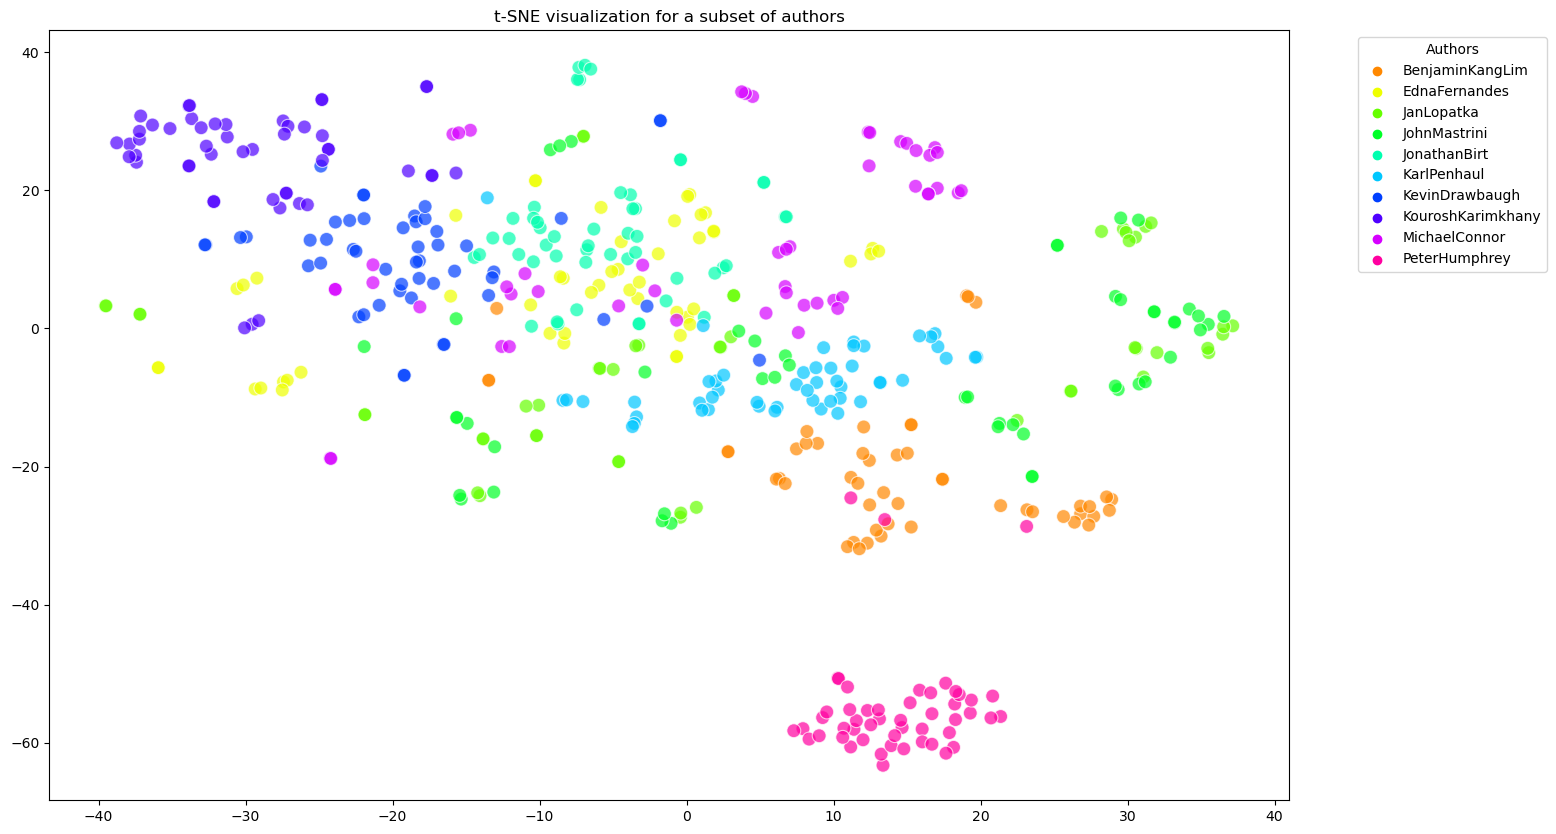

In [10]:
# 1. Choose a subset of 10 authors
unique_authors = list(set(train_labels))
selected_authors = random.sample(unique_authors, 10)

# 2. Filter the training data
filtered_indices = [i for i, label in enumerate(train_labels) if label in selected_authors]
filtered_texts = [train_texts[i] for i in filtered_indices]
filtered_labels = [train_labels[i] for i in filtered_indices]
filtered_dtm = train_dtm[filtered_indices]

# 3. PCA and t-SNE
pca = PCA(n_components=100)
reduced_data_pca = pca.fit_transform(filtered_dtm.toarray())  # Convert sparse matrix to dense matrix
tsne = TSNE(n_components=2, perplexity=20)
tsne_results = tsne.fit_transform(reduced_data_pca)

# 4. Plotting
plt.figure(figsize=(16, 10))
sns.scatterplot(
    x=tsne_results[:, 0], y=tsne_results[:, 1],
    hue=filtered_labels,
    palette=sns.color_palette("hsv", len(selected_authors)),
    alpha=0.7,
    s=100
)
plt.title('t-SNE visualization for a subset of authors')
plt.legend(title='Authors', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Creating a TF IDF Matrix and a Dataframe

Here we create a TF IDF Matrix using the TFIDFVectorizer function and then convert the same to a dataframe for further analysis

In [11]:
vector_train = TfidfVectorizer(tokenizer=preprocess_text, stop_words='english', max_features=2500)
ti_train = vector_train.fit_transform(train_texts)
ti_test = vector_train.transform(test_texts)

train_matrix = ti_train.toarray()
train_set = pd.DataFrame(train_matrix, columns=vector_train.get_feature_names_out())

test_matrix = ti_test.toarray()
test_set = pd.DataFrame(test_matrix, columns=vector_train.get_feature_names_out())

C:\Users\Sai\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor', 'thu', 'togeth', 'twelv', 'twenti', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev'] not in stop_words.
  warnings.warn(


### Random Forest Classifier

We are trying to classify the author of the document with the TF_IDF matrix as the features

In [15]:
run_rf=True #Random Forest to classify authors for the reuters corpus
if run_rf:   
    from sklearn.model_selection import cross_val_score, KFold

    kfold = KFold(n_splits = 5, shuffle = True)

    RF_tracking_df = pd.DataFrame(columns = ["Tree Depth","Number of Trees","Max Features","Accuracy Score"])

    #For Loop of Nodes, For Loop of Trees, and Mtry
    for max_depth in [30, 50, 70]:
        for n_estimators in [1500]:
            for mtry in [10, "sqrt",100]:
            # Initialize Random Forest Classifier with desired parameters
                rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, max_features=mtry)

                # Use cross-validation to evaluate the model
                scores_rf = cross_val_score(rf, train_set, train_labels, cv=kfold)

                # Calculate and print the average score
                print('Random Forest - Depth = {} Trees = {} Mtry = {} Accuracy = {}'.format(max_depth, n_estimators,mtry, round(scores_rf.mean(),3)))

                #Append to RandomForest DataFrame 
                new_row_df = pd.DataFrame([[max_depth,n_estimators,mtry,scores_rf.mean()]], columns=RF_tracking_df.columns)
                RF_tracking_df = pd.concat([RF_tracking_df,new_row_df ], ignore_index=True)

    RF_tracking_df.to_csv("RFBestParam.csv")

Random Forest - Depth = 30 Trees = 1500 Mtry = 10 Accuracy = 0.805
Random Forest - Depth = 30 Trees = 1500 Mtry = sqrt Accuracy = 0.806
Random Forest - Depth = 30 Trees = 1500 Mtry = 100 Accuracy = 0.798
Random Forest - Depth = 50 Trees = 1500 Mtry = 10 Accuracy = 0.813
Random Forest - Depth = 50 Trees = 1500 Mtry = sqrt Accuracy = 0.809
Random Forest - Depth = 50 Trees = 1500 Mtry = 100 Accuracy = 0.803
Random Forest - Depth = 70 Trees = 1500 Mtry = 10 Accuracy = 0.81
Random Forest - Depth = 70 Trees = 1500 Mtry = sqrt Accuracy = 0.815
Random Forest - Depth = 70 Trees = 1500 Mtry = 100 Accuracy = 0.804


We now filter the model for the best accuracy and parameters

In [21]:
#Create DF and reset index
RF_tracking_df = pd.read_csv("RFBestParam.csv")
RF_tracking_df.reset_index(drop=True,inplace=True)

#Pull the best node and tree for training accuracy
best_depth = RF_tracking_df.iloc[RF_tracking_df["Accuracy Score"].idxmax()]["Tree Depth"]
best_n = RF_tracking_df.iloc[RF_tracking_df["Accuracy Score"].idxmax()]["Number of Trees"]

#Pull best Mtry
try:
    best_feat = int(RF_tracking_df.iloc[RF_tracking_df["Accuracy Score"].idxmax()]["Max Features"])
except:
    best_feat = RF_tracking_df.iloc[RF_tracking_df["Accuracy Score"].idxmax()]["Max Features"]
    
model_rf = RandomForestClassifier(n_estimators=int(best_n), max_depth = int(best_depth),max_features=best_feat)

print('Random Forest best parameters after CV - Depth = {} Trees = {} Mtry = {}'.format(best_depth, best_n,best_feat))

rf.fit(train_set, train_labels)

Random Forest best parameters after CV - Depth = 70 Trees = 1500 Mtry = sqrt


RandomForestClassifier(max_depth=70, max_features=100, n_estimators=1500)

Testing the above model

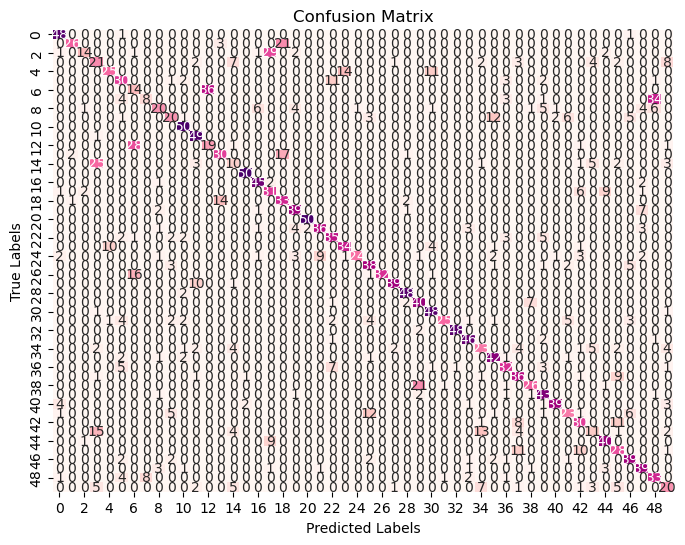

In [27]:
y_pred = rf.predict(test_set)

cm = confusion_matrix(test_labels, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap = 'RdPu', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate the accuracy
accuracy = accuracy_score(test_labels, y_pred)
test_labels_series=pd.Series(test_labels)
baseline_accuracy=len(test_labels_series[test_labels_series==test_labels_series.value_counts().idxmax()])/len(test_labels_series)

incorrect_predictions_sum = cm.sum(axis=1) - np.diag(cm)
worst_labels_indices = incorrect_predictions_sum.argsort()[-5:][::-1]
worst_labels = [pd.Series(test_labels).unique()[i] for i in worst_labels_indices]

In [32]:
baseline = round(baseline_accuracy,2)*100
test_acc = accuracy*100

print(baseline)
print(test_acc)

print("\nTop 5 labels with the worst predictions:\n")
for label in worst_labels:
    print(label)

2.0
65.16

Top 5 labels with the worst predictions:

DavidLawder
JanLopatka
ScottHillis
AlexanderSmith
DarrenSchuettler


*It is clear that our accuracy is far better than the baseline accuracy of 2%*

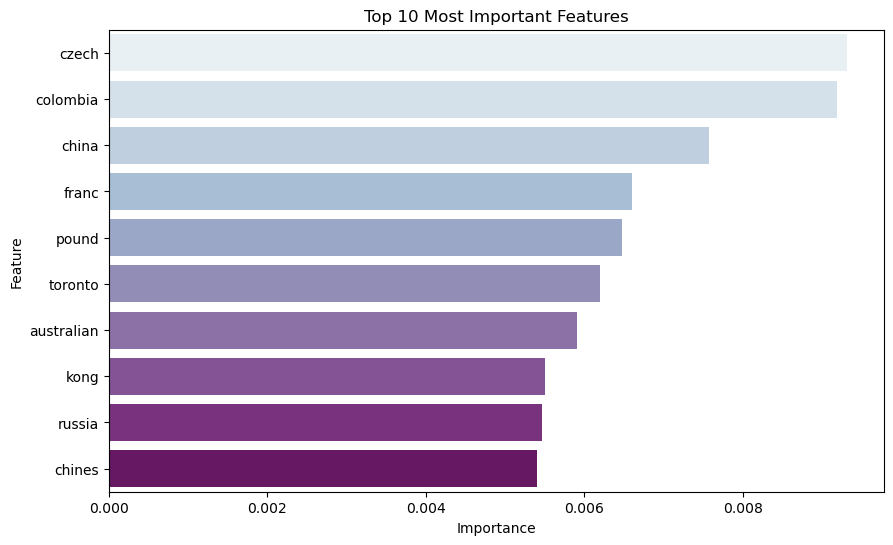

In [37]:
feature_importances = rf.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': train_set.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Specify the number of top features to visualize
n = 10  # Change this value to set the number of top features

# Select the top n features
top_features = feature_importance_df.head(n)

# Create a bar plot of top n features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', palette = 'BuPu', data=top_features)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title(f'Top {n} Most Important Features')
plt.show()

1. We can see that tokens like Czech, Columbia, China, and France are important in identifying the different authors. This must mean that they identify the author's location or most of the author's works/content are related to specific countries
2. Terms like Pound, Australian, Chinese are also important in classifying the author which could mean that specific authors have specific places or things about the locations that they mention in their work/content

Overall, Location is a very important factor in author classification